 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_csv("us_baby_names.csv")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.Gender = df.Gender.astype("category")

In [ ]:
names_2018 = df[df.Year == 2018].copy()
names_2018

In [ ]:
names_2018[names_2018.Gender == "F"].nlargest(10, "Count")

In [ ]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

In [ ]:
most_pop(2018, "F", 10)

In [ ]:
most_pop(2018, "M", 10)

## Evergreen Names (1880 - 2018)

In [ ]:
f_2018 = most_pop(2018, "F", 20)
f_2018

In [ ]:
f_1880 = most_pop(1880, "F", 20)
f_1880

In [ ]:
f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name")

In [ ]:
f_evergreen = f_2018[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name", 
                           suffixes=("_2018", "_1880"))
f_evergreen

In [ ]:
m_2018 = most_pop(2018, "M", 20)
m_2018

In [ ]:
m_1880 = most_pop(1880, "M", 20)
m_1880

In [ ]:
m_evergreen = m_2018[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2018", "_1880"))
m_evergreen

## Advanced Data Aggregation

In [3]:
df = pd.read_csv("us_baby_names.csv")

In [9]:
df.groupby(["Name", "Gender"]).Count.sum()

Name     Gender
Aaban    M         114
Aabha    F          35
Aabid    M          16
Aabidah  F           5
Aabir    M          10
                  ... 
Zyvion   M           5
Zyvon    M           7
Zyyanna  F           6
Zyyon    M           6
Zzyzx    M          10
Name: Count, Length: 109173, dtype: int64

In [14]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level=-1)

,Gender,Count
Name,,
Aaban,M,114
Aabha,F,35
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [15]:
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [16]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [17]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [18]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year) # this can take a couple of minutes!!!

KeyboardInterrupt: 

In [19]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [ ]:
best_y.droplevel(-1)

In [ ]:
agg["Best_Year"] = best_y.droplevel(-1)

In [ ]:
agg

In [ ]:
agg.reset_index(inplace = True)

In [ ]:
agg

In [ ]:
agg[(agg.Name == "Mary") & (agg.Gender == "M")]

## Most Popular Names of all Times

In [ ]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total"))

In [ ]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

## General Trends over time (1880 - 2018)

In [20]:
pd.options.display.float_format = '{:.0f}'.format

In [21]:
babies_per_year = df.groupby("Year").Count.sum()

In [22]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

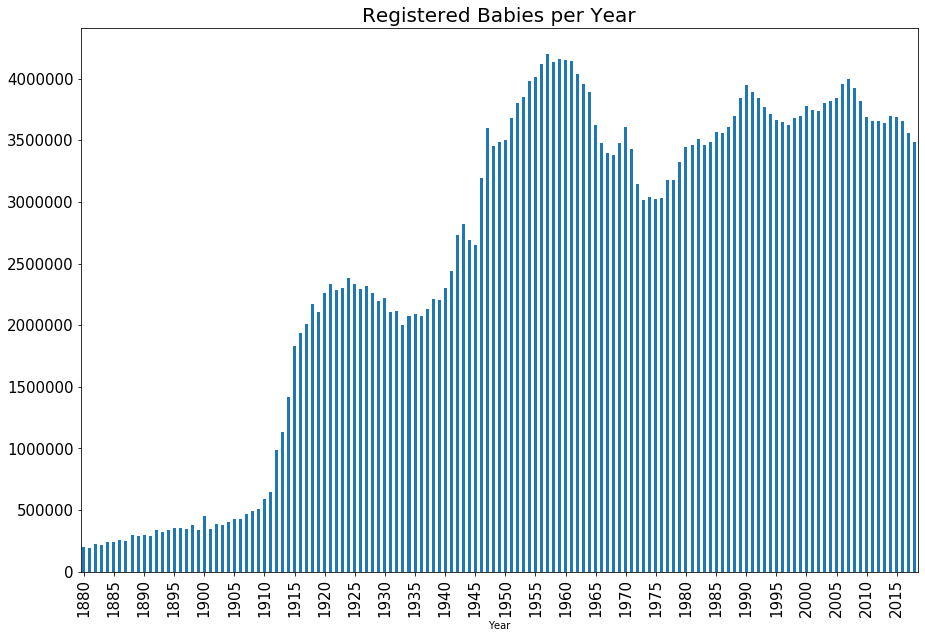

In [23]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [24]:
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

In [ ]:
diff_names.plot(kind = "bar", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

In [25]:
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


__Popularity (babies per million)__

In [30]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [ ]:
7065 / 90994 * 1000000

In [31]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [33]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

In [34]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
1957041,2018,Zylas,M,5,3
1957042,2018,Zyran,M,5,3
1957043,2018,Zyrie,M,5,3
1957044,2018,Zyron,M,5,3


__Rank__

In [35]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [ ]:
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [ ]:
df

In [ ]:
df[(df.Year == 2018) & (df.Gender == "M")].tail(60)

In [ ]:
df[(df.Year == 2018) & (df.Gender == "M")].Popularity.sum()

## Visualizing Name Trends over Time

In [ ]:
df

In [ ]:
mary = df[(df.Name == "Mary") & (df.Gender == "F")]
mary.tail(60)

In [ ]:
fig, ax1 = plt.subplots(figsize = (12, 8))
ax1.bar(x = mary.Year, height= mary.Popularity, label = "Popularity")
ax2 = ax1.twinx()
ax2.plot(mary.Year, mary.Rank, color = "red", label = "Rank")
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_ylabel("Babies per million", fontsize = 15)
ax2.set_ylabel("Rank", fontsize = 15)
ax1.set_title("Mary", fontsize = 18)
ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax1.legend(loc = 2, fontsize = 15)
ax2.legend(loc = 1, fontsize = 15)
plt.show()

In [ ]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

In [ ]:
plot_name("Mary", "F")

In [ ]:
plot_name("Mary", "F", crit = "Count")

In [ ]:
plot_name("James", "M", crit = "Popularity")

In [ ]:
m_evergreen

In [ ]:
for name in m_evergreen.Name:
    plot_name(name, "M", crit = "Popularity")

In [ ]:
for name in f_evergreen.Name:
    plot_name(name, "F", crit = "Popularity")

## Why does a Name´s Popularity suddenly change? (Part 1)

In [ ]:
df

In [ ]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

In [ ]:
df["Pop_lag1"] = df.groupby(["Name", "Gender"]).Popularity.shift()

In [ ]:
df

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df.loc[(df.Year > 1880) & (df.Pop_lag1.isna()), "Pop_lag1"] = 0

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df["Pop_diff"] = df.Popularity - df.Pop_lag1

In [ ]:
df[(df.Name == "Mary") & (df.Gender == "F")]

In [ ]:
df[df.Name == "Ashanti"]

In [ ]:
df2 = df[df.Year >= 1900].copy()

In [ ]:
df2

In [ ]:
df2.nlargest(20, "Pop_diff")

In [ ]:
plot_name("Linda", "F")

In [ ]:
plot_name("Shirley", "F")

In [ ]:
plot_name("Jason", "M")

In [ ]:
df2.nsmallest(20, "Pop_diff")

## Why does a Name´s Popularity suddenly change? (Part 2)

__'From 0 to 100' Names__

In [ ]:
df2[(df2.Pop_lag1 < 5)].nlargest(20, "Pop_diff")

In [ ]:
df2[df2.Name == "Nakia"]

In [ ]:
plot_name("Nakia", "F")

In [ ]:
plot_name("Nakia", "M")

In [ ]:
plot_name("Kizzy", "F")

In [ ]:
plot_name("Rihanna", "F")

In [ ]:
plot_name("Whitney", "F")

In [ ]:
plot_name("Shaquille", "M")

__Highest percentage decrease among popular names__

In [ ]:
df2

In [ ]:
df2["%change"] = df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [ ]:
df2

In [ ]:
df2[df2.Pop_lag1 > 1000].nsmallest(20, "%change")

In [ ]:
plot_name("Katina", "F")

In [ ]:
plot_name("Iesha", "F")

In [ ]:
plot_name("Ashanti", "F")

In [ ]:
plot_name("Woodrow", "M")

In [ ]:
plot_name("Hillary", "F")

## Persistant vs. Spike-Fade Names

In [ ]:
agg

In [ ]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [ ]:
agg

In [ ]:
agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head(20)

In [ ]:
pers

In [ ]:
l = list(zip(pers.Name, pers.Gender))
l

In [ ]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [ ]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head(20)
spike

In [ ]:
l2 = list(zip(spike.Name, spike.Gender))
l2

In [ ]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

In [ ]:
df

In [ ]:
df[df.Name == "Mary"].groupby(["Name", "Gender"]).Count.sum()

In [ ]:
df.groupby(["Name", "Gender"]).Count.sum().unstack()

In [ ]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

In [ ]:
unisex.dropna(inplace = True)

In [ ]:
unisex

In [ ]:
unisex.min(axis = 1).sort_values(ascending = False)

In [ ]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

In [ ]:
unisex.loc[unisex_names].head(20)

In [ ]:
unisex = unisex[unisex.min(axis = 1) > 10000]
unisex

In [ ]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

In [ ]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex_names2

In [ ]:
unisex.loc[unisex_names2].head(20)